# Análise Exploratória Mercado Financeiro

### Python e Financas

Bibliotecas mais usadas

- pandas
- matplotlib
- numpy
- datetime

Ferramentas para puxar cotacoes e afins

- pandas_datareader
- yfinance

In [ ]:
!pip install pandas-datareader
!pip install yfinance

Referencias

- Indices:

^INDICE -> ^BVSP (BOVESPA)

- Ações BR:

TICKER.SA -> ITUB4.SA

- Acoes Internacionais
TICKER -> GOOG

In [54]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf

### Analisando IBOV

In [208]:
data_inicial = datetime.now() - timedelta(days=360)
data_final = datetime.now() - timedelta(days=1)

df_ibov = yf.download("^BVSP", data_inicial, data_final)
display(df_ibov)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^BVSP,^BVSP,^BVSP,^BVSP,^BVSP
Date,,,,,
2024-04-22,125573.0,126081.0,124633.0,125124.0,10264100
2024-04-23,125148.0,125826.0,124310.0,125572.0,11257800
2024-04-24,124741.0,125473.0,124556.0,125149.0,10526300
2024-04-25,124646.0,124732.0,123703.0,124718.0,10093100
2024-04-26,126526.0,126826.0,124651.0,124651.0,8900000
...,...,...,...,...,...
2025-04-08,123932.0,127652.0,123454.0,125588.0,12814700
2025-04-09,127796.0,128649.0,122887.0,123928.0,16919800


### Retorno do IBOV

In [98]:
print(df_ibov["Close"].iloc[-1])  # Último valor
print(df_ibov["Close"].iloc[0])   # Primeiro valor

Ticker
^BVSP    129454.0
Name: 2025-04-14 00:00:00, dtype: float64
Ticker
^BVSP    128869.0
Name: 2025-02-17 00:00:00, dtype: float64


In [100]:
retorno_ibov = (df_ibov["Close"].iloc[-1] / df_ibov["Close"].iloc[0]) - 1
retorno_ibov = retorno_ibov.item()  # Transforma em float
print(f"O retorno do IBOV foi: {retorno_ibov:.1%}")

O retorno do IBOV foi: 0.5%


### Analisando Grafico

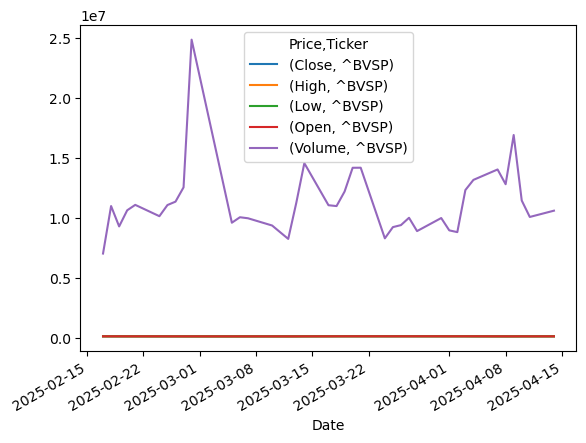

In [102]:
df_ibov.plot()
plt.show()

### Media Movel

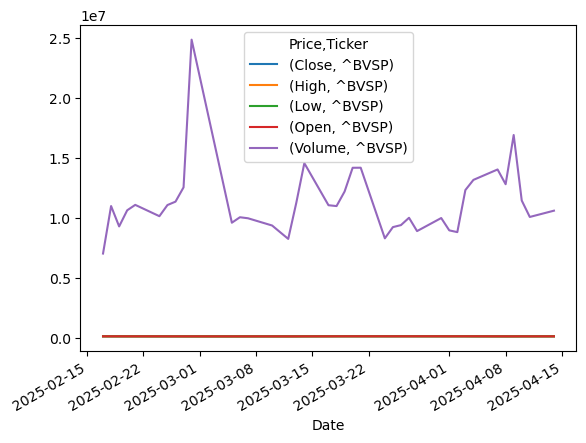

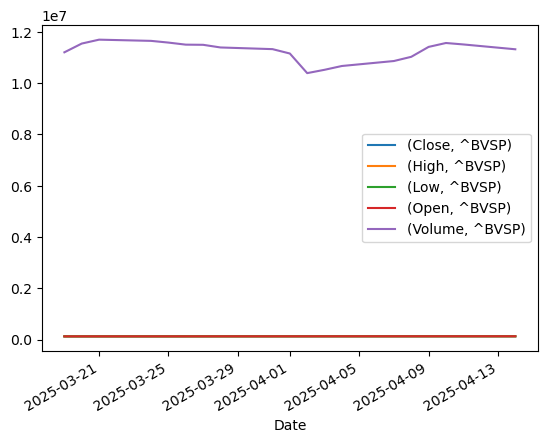

In [110]:
df_ibov.plot(label="IBOV")
media_movel = df_ibov.rolling(21).mean()
media_movel.plot(label="Media Movel 21 Dias")
plt.legend()
plt.show()

### Exemplo Real: Carteira de Ativos

- Temos a carteira no arquivo "Carteira.xlsx" e queremos comparar essa carteira com o indice IBOV para saber se ela ganhou do indice

In [113]:
df_carteira = pd.read_excel("Carteira.xlsx")
display(df_carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,100
3,BBDC4,Ação,100
4,ITUB4,Ação,300
5,ENEV3,Ação,100
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,NTCO3,Ação,100
9,BCRI11,FII,100


In [136]:
data_inicial = datetime.now() - timedelta(days=360)
data_final = datetime.now() - timedelta(days=1)

lista_ativos = list(df_carteira["Ativos"].astype(str) + ".SA")
print(lista_ativos)

['BOVA11.SA', 'SMAL11.SA', 'MGLU3.SA', 'BBDC4.SA', 'ITUB4.SA', 'ENEV3.SA', 'MOVI3.SA', 'BPAC11.SA', 'NTCO3.SA', 'BCRI11.SA', 'VILG11.SA', 'KNRI11.SA', 'XPLG11.SA']


In [138]:
df_cotacoes = yf.download(lista_ativos, data_inicial, data_final)["Close"]
display(df_cotacoes)

[*********************100%***********************]  13 of 13 completed


Ticker,BBDC4.SA,BCRI11.SA,BOVA11.SA,BPAC11.SA,ENEV3.SA,ITUB4.SA,KNRI11.SA,MGLU3.SA,MOVI3.SA,NTCO3.SA,SMAL11.SA,VILG11.SA,XPLG11.SA
Date,,,,,,,,,,,,,
2024-04-22,12.212635,61.528179,121.800003,32.369858,12.44,26.814827,150.476852,15.30,7.001348,16.049999,101.110001,86.124977,96.297318
2024-04-23,12.293571,60.559227,121.410004,31.816113,12.45,27.214542,149.759491,14.40,6.895992,16.700001,100.900002,85.313774,96.215637
2024-04-24,12.293571,60.291027,120.970001,31.816113,12.50,27.095480,149.649109,14.30,6.867259,16.440001,99.980003,84.876274,95.126389
2024-04-25,12.284578,60.100712,120.910004,31.670389,12.66,26.942400,150.366486,13.90,6.761903,16.520000,99.400002,84.065056,95.081017
2024-04-26,12.482426,59.944984,122.830002,33.127617,12.83,27.393143,150.329681,14.30,7.010925,16.879999,101.760002,84.128876,95.081017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-08,12.020000,65.000000,121.040001,33.599998,11.95,31.209999,132.500000,8.78,5.230000,9.400000,91.199997,77.589996,93.800003
2025-04-09,12.470000,64.910004,124.550003,34.029999,12.34,31.780001,133.009995,9.77,5.400000,9.880000,93.199997,77.879997,93.750000
2025-04-10,12.450000,64.760002,123.410004,33.580002,12.22,31.650000,133.139999,10.21,5.520000,9.480000,92.199997,79.000000,93.669998


### Ajustando Dados

print(df_cotacoes.info())

In [144]:
# caso tivesse dados nulos, preencher com os dados do dia anterior

df_cotacoes = df_cotacoes.ffill()
print(df_cotacoes.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2024-04-22 to 2025-04-14
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BBDC4.SA   246 non-null    float64
 1   BCRI11.SA  246 non-null    float64
 2   BOVA11.SA  246 non-null    float64
 3   BPAC11.SA  246 non-null    float64
 4   ENEV3.SA   246 non-null    float64
 5   ITUB4.SA   246 non-null    float64
 6   KNRI11.SA  246 non-null    float64
 7   MGLU3.SA   246 non-null    float64
 8   MOVI3.SA   246 non-null    float64
 9   NTCO3.SA   246 non-null    float64
 10  SMAL11.SA  246 non-null    float64
 11  VILG11.SA  246 non-null    float64
 12  XPLG11.SA  246 non-null    float64
dtypes: float64(13)
memory usage: 26.9 KB
None


### Para compararmos oscilacoes, precisamos normalizar

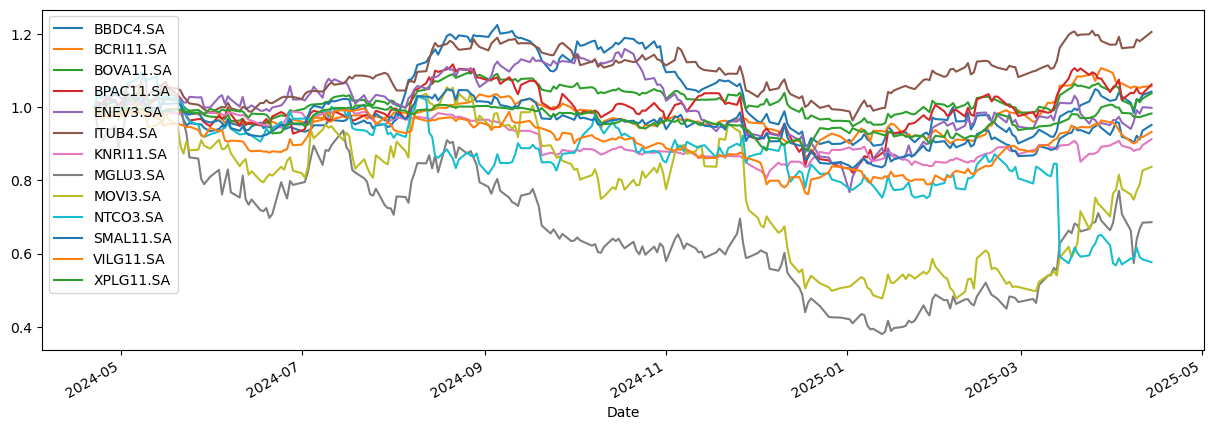

In [153]:
df_cotacoes_norm = df_cotacoes / df_cotacoes.iloc[0]
df_cotacoes_norm.plot(figsize=(15,5))
plt.legend(loc="upper left")
plt.show()

### Puxando o IBOV para comparar

In [155]:
df_ibov = yf.download("^BVSP", data_inicial, data_final)["Close"]
display(df_ibov)

[*********************100%***********************]  1 of 1 completed


Ticker,^BVSP
Date,
2024-04-22,125573.0
2024-04-23,125148.0
2024-04-24,124741.0
2024-04-25,124646.0
2024-04-26,126526.0
...,...
2025-04-08,123932.0
2025-04-09,127796.0
2025-04-10,126355.0


### Vendo valores investidos

In [165]:
df_valor_investido = pd.DataFrame()

for ativo in df_carteira["Ativos"]:
    qtde_acoes = df_carteira.loc[df_carteira["Ativos"]==ativo, "Qtde"].values[0]
    df_valor_investido[ativo] = qtde_acoes * df_cotacoes[f"{ativo}.SA"]

df_valor_investido["Total"] = df_valor_investido.sum(axis=1)
display(df_valor_investido)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11,Total
Date,,,,,,,,,,,,,,
2024-04-22,12180.000305,10111.000061,1530.000019,1221.263504,8044.448090,1243.999958,700.134754,3236.985779,1604.999924,6152.817917,8612.497711,15047.685242,9629.731750,79315.565014
2024-04-23,12141.000366,10090.000153,1439.999962,1229.357052,8164.362717,1244.999981,689.599180,3181.611252,1670.000076,6055.922699,8531.377411,14975.949097,9621.563721,79035.743666
2024-04-24,12097.000122,9998.000336,1430.000019,1229.357052,8128.643990,1250.000000,686.725855,3181.611252,1644.000053,6029.102707,8487.627411,14964.910889,9512.638855,78639.618540
2024-04-25,12091.000366,9940.000153,1389.999962,1228.457832,8082.719994,1265.999985,676.190329,3167.038918,1652.000046,6010.071182,8406.505585,15036.648560,9508.101654,78454.734564
2024-04-26,12283.000183,10176.000214,1430.000019,1248.242569,8217.942810,1282.999992,701.092529,3312.761688,1687.999916,5994.498444,8412.887573,15032.968140,9508.101654,79288.495731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-08,12104.000092,9119.999695,877.999973,1202.000046,9362.999725,1194.999981,523.000002,3359.999847,939.999962,6500.000000,7758.999634,13250.000000,9380.000305,75573.999262
2025-04-09,12455.000305,9319.999695,977.000046,1247.000027,9534.000206,1234.000015,540.000010,3402.999878,988.000011,6491.000366,7787.999725,13300.999451,9375.000000,76652.999735
2025-04-10,12341.000366,9219.999695,1021.000004,1244.999981,9494.999886,1222.000027,551.999998,3358.000183,947.999954,6476.000214,7900.000000,13313.999939,9366.999817,76459.000063


### Comparando carteira com o Indice

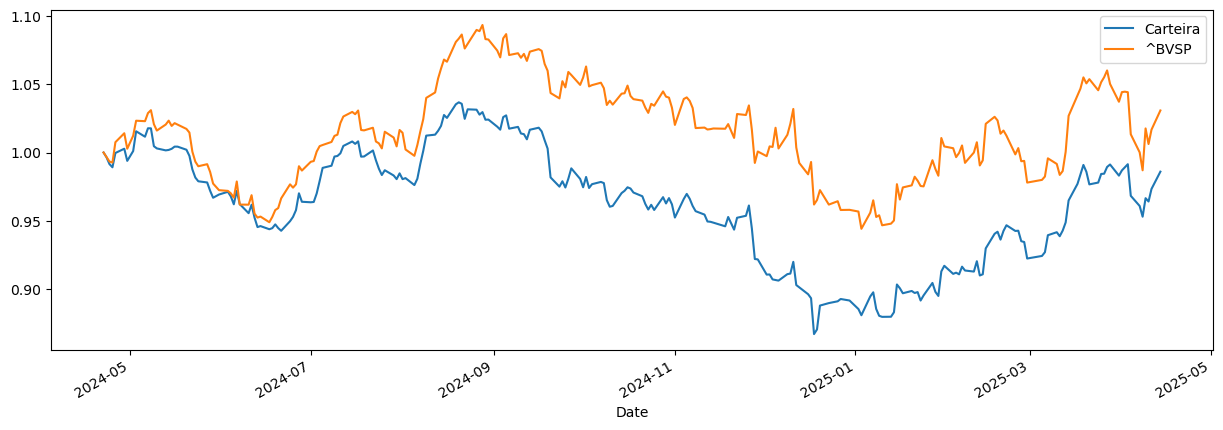

In [176]:
df_ibov_norm = df_ibov / df_ibov.iloc[0]
df_valor_investido_norm = df_valor_investido / df_valor_investido.iloc[0]

fig, ax = plt.subplots(figsize=(15, 5))
df_valor_investido_norm["Total"].plot(ax=ax, label="Carteira")

df_ibov_norm.plot(ax=ax, label="IBOV")
plt.legend()
plt.show()

### Calculando retorno a correlaçao

In [190]:
# Retorno

retorno_ibov = df_ibov_norm.iloc[-1].item() - 1
retorno_carteira = df_valor_investido_norm["Total"].iloc[-1].item() - 1

print(f"Retorno IBOV: {retorno_ibov:.1%}")
print(f"Retorno Carteira: {retorno_carteira:.1%}")

Retorno IBOV: 3.1%
Retorno Carteira: -1.4%


In [210]:
# Correlacao

print(df_valor_investido["Total"].shape)
print(df_ibov["Close"].shape)

(246,)
(246, 1)


In [214]:
correlacao = df_valor_investido["Total"].corr(df_ibov["Close"].squeeze())
print(f"Correlação entre Carteira e IBOV: {correlacao:.4f}")

Correlação entre Carteira e IBOV: 0.7287
